# Couple of experiments on image size
to understand what exactly happens to initial images in fastai pipeline

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [7]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [38]:
PATH = "data/dogscats/"

In [39]:
files = os.listdir(f'{PATH}valid/cats')[:20]

So initial images look like this

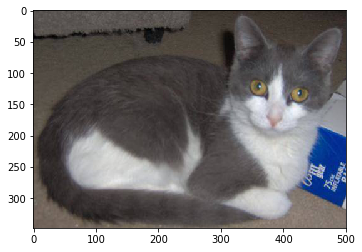

In [40]:
img1 = plt.imread(f'{PATH}valid/cats/{files[7]}')
img2 = plt.imread(f'{PATH}valid/cats/{files[8]}')
plt.imshow(img1);

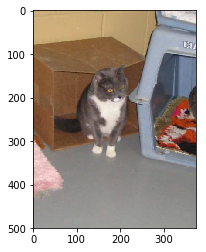

In [41]:
plt.imshow(img2);

We on purpose take some not square ones, to see how data loader will crop them.

In [79]:
# start with size 64
sz=64

In [80]:
# loading data without any data augmentations
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [81]:
# using Jeremy's function to plot training image

def get_augs(n):
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[n]

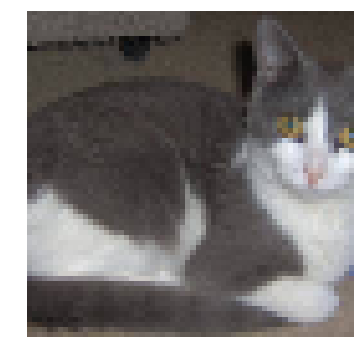

In [82]:
train_img1 = np.stack([get_augs(7) for i in range(1)])
plots(train_img1, rows=1)

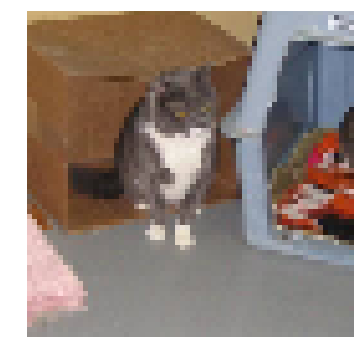

In [83]:
train_img2 = np.stack([get_augs(8) for i in range(1)])
plots(train_img2)

So we see a square is fit to the middle of original image (side of the square = smaller dimension of initial image). And then it's resized to 64x64.

Trying with bigger size.

In [84]:
sz = 128

In [85]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

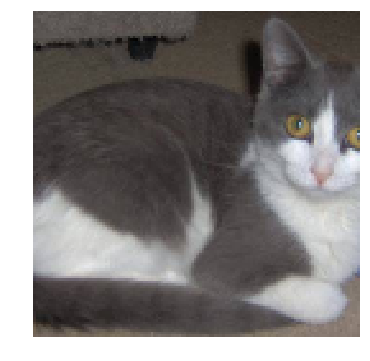

In [86]:
train_img1 = np.stack([get_augs(7) for i in range(1)])
train_img2 = np.stack([get_augs(8) for i in range(1)])
plots(train_img1)

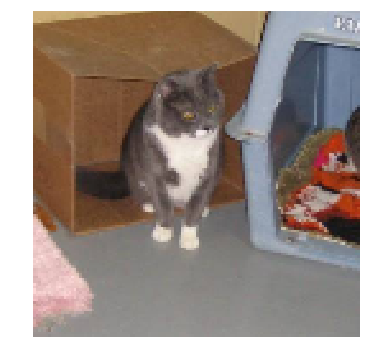

In [87]:
plots(train_img2)

Trying with smaller size.

In [75]:
sz = 32

In [76]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

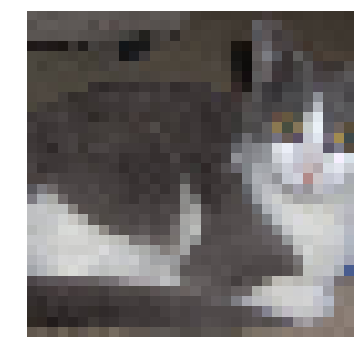

In [77]:
train_img1 = np.stack([get_augs(7) for i in range(1)])
train_img2 = np.stack([get_augs(8) for i in range(1)])
plots(train_img1)

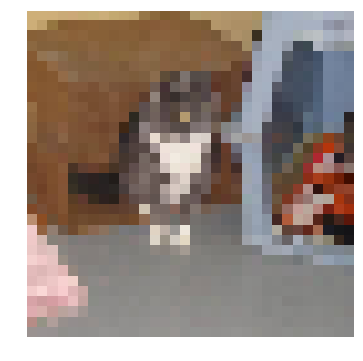

In [78]:
plots(train_img2)